## Coupon collector problem

Suppose you buy boxes of cereals. Each box contains one of $n$ different coupons. Once you obtain every type of coupon, you qualify for a price. Assume that the coupons in each box is chosen independently and uniformly at random from the $n$ possible different coupons. Assume also that you do not collaborate with other people to collect coupons. How many boxes of cereals must you buy in average before you obtain at least one of every type of coupon?

In [2]:
import numpy as np
from math import log

def run(n,flag):
    """
    n: number of different coupons (stamps)
    return: boxes to be opened until all coupons are collected
    """
    boxes = 0
    collected = set()
    while True:
        # check if we have collected all coupons
        if len(collected) == n:
            break
        # if not, we try to collect coupons 
        got = np.random.randint(0, n)  # choose a coupon, randomly 1/n
        boxes += 1 #add one box to the count
        collected.add(got) #add the coupon we got to the collection, if it is new
        if flag==True:
            print(got,collected)
    return boxes

Let us now visualize a run of the coupon collector problem

In [3]:
n_coupon=10
boxes= run(n_coupon,True)
print(boxes)

9 {9}
2 {9, 2}
5 {9, 2, 5}
2 {9, 2, 5}
1 {9, 2, 5, 1}
4 {1, 2, 4, 5, 9}
6 {1, 2, 4, 5, 6, 9}
6 {1, 2, 4, 5, 6, 9}
3 {1, 2, 3, 4, 5, 6, 9}
2 {1, 2, 3, 4, 5, 6, 9}
5 {1, 2, 3, 4, 5, 6, 9}
4 {1, 2, 3, 4, 5, 6, 9}
4 {1, 2, 3, 4, 5, 6, 9}
5 {1, 2, 3, 4, 5, 6, 9}
6 {1, 2, 3, 4, 5, 6, 9}
0 {0, 1, 2, 3, 4, 5, 6, 9}
6 {0, 1, 2, 3, 4, 5, 6, 9}
1 {0, 1, 2, 3, 4, 5, 6, 9}
5 {0, 1, 2, 3, 4, 5, 6, 9}
6 {0, 1, 2, 3, 4, 5, 6, 9}
9 {0, 1, 2, 3, 4, 5, 6, 9}
9 {0, 1, 2, 3, 4, 5, 6, 9}
2 {0, 1, 2, 3, 4, 5, 6, 9}
7 {0, 1, 2, 3, 4, 5, 6, 7, 9}
4 {0, 1, 2, 3, 4, 5, 6, 7, 9}
9 {0, 1, 2, 3, 4, 5, 6, 7, 9}
3 {0, 1, 2, 3, 4, 5, 6, 7, 9}
8 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
28


In [4]:
n_coupon = 10 #number of coupons to collect
runs = 5000    #number of simulation runs 
    
# some initializations
totalboxes = 0   
  
for x in range(1, runs):  
    boxes = run(n_coupon,False)
    totalboxes += boxes

print("average number of boxes {:.2f}".format(totalboxes / runs))


average number of boxes 29.42


In [5]:
def HN(n):
    return sum(1/np.arange(1,n+1))

mean = n_coupon*HN(n_coupon)
print("theoretical prediction {:.2f}".format(mean))

theoretical prediction 29.29


Now we verify that the harmonic number $H(n)$ behaves roughly as $\log n$

[Text(0, 0.5, '$y$')]

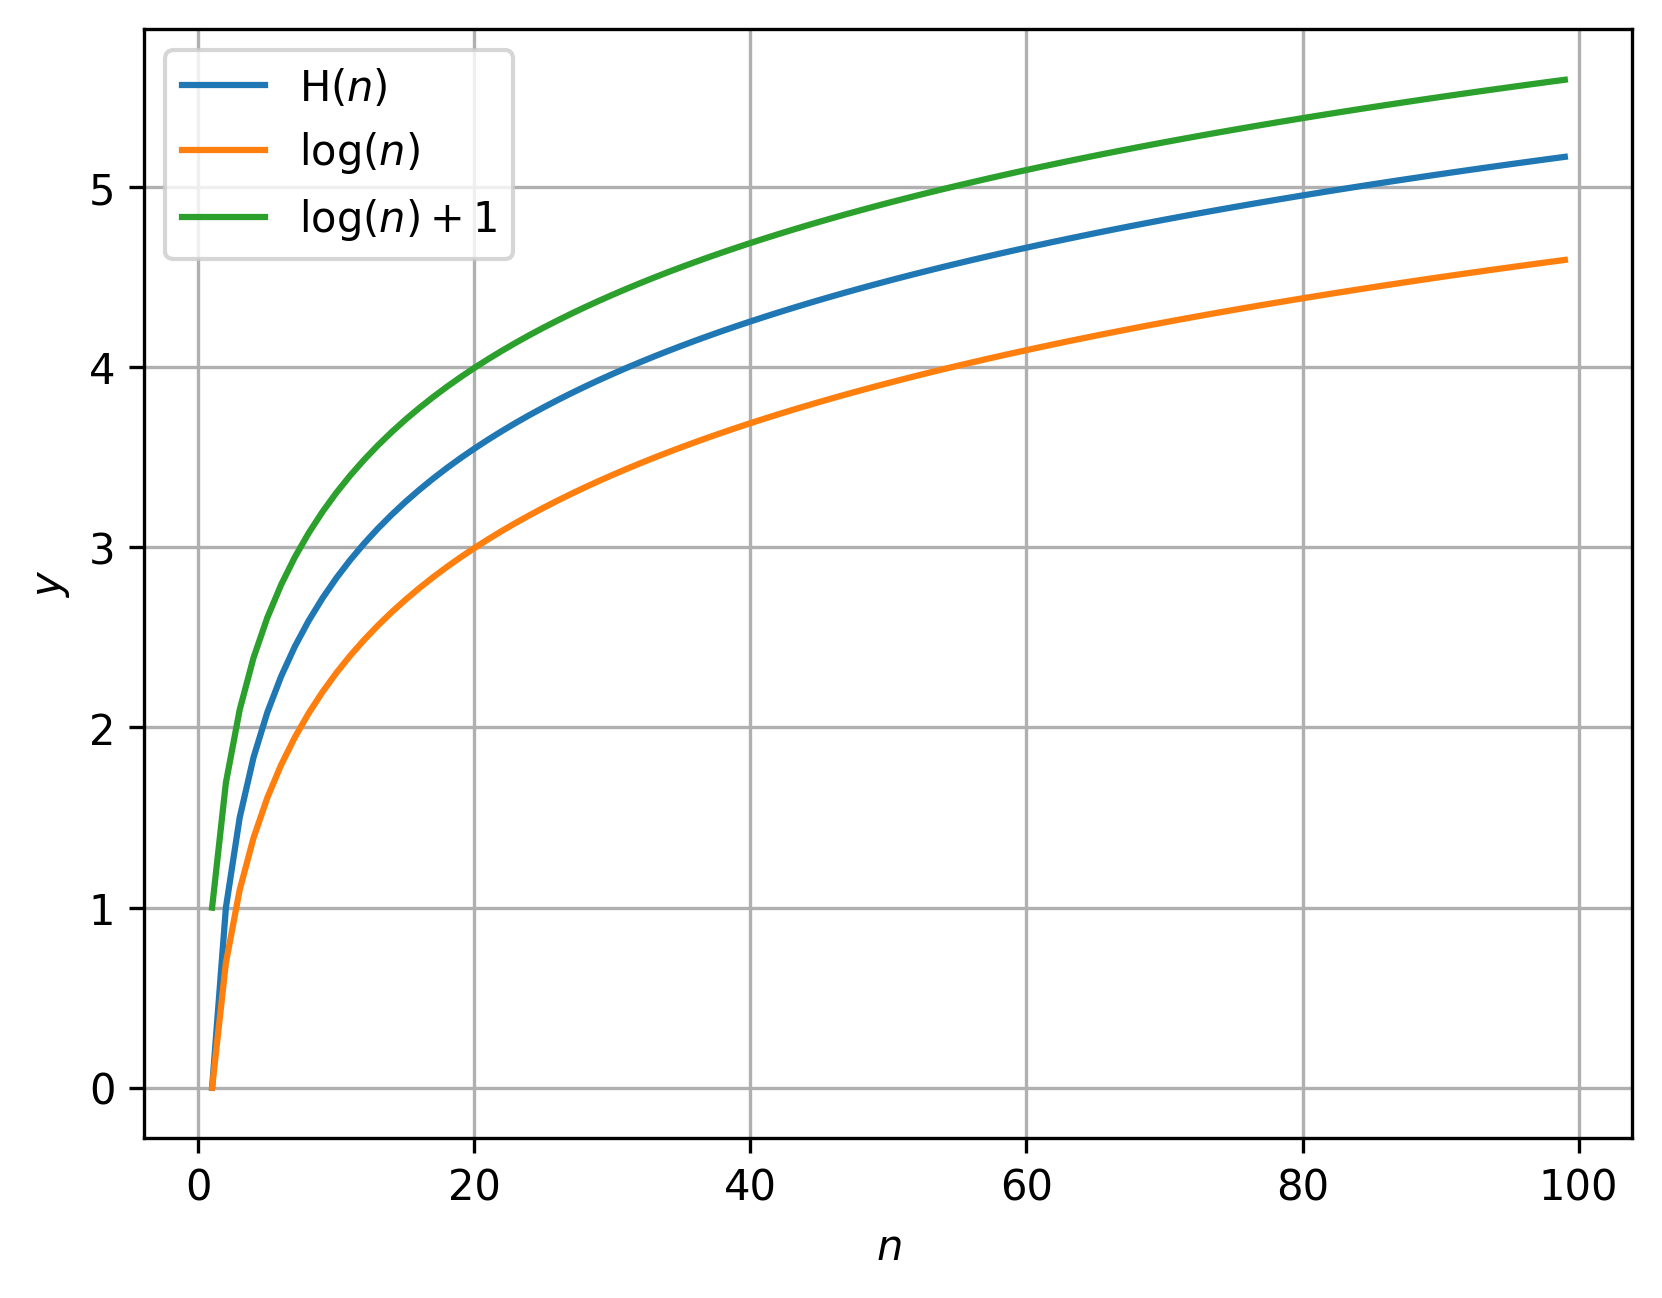

In [11]:
import matplotlib.pyplot as plt 
plt.rcParams['figure.dpi'] = 300 #to increase resolution figures 

n = np.arange(1,100)

HNvec=np.zeros(99)

for nn in n:
    HNvec[nn-1]=HN(nn-1)
    

fig, ax = plt.subplots()   
ax.plot(n,HNvec,label='$\mathrm{H}(n)$')
ax.grid()
ax.plot(n,np.log(n),label='$\log(n)$')
ax.plot(n,(np.log(n)+1),label='$\log(n)+1$')
ax.legend()
ax.set(xlabel='$n$')